# Image Classification Model Deployment - CNN

**Raynold Panji Zulfiandi**

> Emotion Detection

> Dataset: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

GPU device not found


# Data Preparation

In [3]:
!pip install -q kaggle
from google.colab import files 

In [4]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynoldpanji","key":"a8ffbcc0e57e57752a578052cf0c986b"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 63% 41.0M/65.2M [00:00<00:00, 105MB/s] 
100% 65.2M/65.2M [00:00<00:00, 135MB/s]


In [7]:
!mkdir datasets
!unzip -q emotion-detection-fer.zip -d datasets
!ls datasets

test  train


In [8]:
!ls datasets/test

angry  disgusted  fearful  happy  neutral  sad	surprised


In [9]:
TRAINING_DIR = '/content/datasets/train/'
VALIDATION_DIR = '/content/datasets/test/'

In [10]:
import os
os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)

(['surprised', 'angry', 'neutral', 'sad', 'fearful', 'disgusted', 'happy'],
 ['surprised', 'angry', 'neutral', 'sad', 'fearful', 'disgusted', 'happy'])

In [11]:
## cek jumlah dataset
def jum_data():
  train = []
  val = []
  lists = os.listdir(TRAINING_DIR)
  for cls in lists:
    train.append(len(os.listdir(os.path.join(TRAINING_DIR, cls))))
  for cls in lists:
    val.append(len(os.listdir(os.path.join(VALIDATION_DIR, cls))))
  return train, val, lists

def cek_data():
  chs = []
  train, val, lists = jum_data()
  
  msg="\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    ch = round(tot*0.8)
    chs.append(ch-train[i])
    percen = ": "+str(80)+"% dari total ✓✓" if (ch==train[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {train[i]} ===> {ch} {percen}"
  msg=msg+"\ntotal : "+str(sum(train))
  
  msg=msg+"\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    percen = ": "+str(20)+"% dari total ✓✓" if (round(tot*0.2)==val[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {val[i]} ===> {round(tot*0.2)} {percen}"
  msg=msg+"\ntotal : "+str(sum(val))

  msg=msg+"\n======================================"
  return msg, chs

print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total angry	: 3995 ===> 3962 -
total neutral	: 4965 ===> 4958 -
total sad	: 4830 ===> 4862 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total disgusted	: 436 ===> 438 -
total happy	: 7215 ===> 7191 -
total : 28709
total surprised	: 831 ===> 800 -
total angry	: 958 ===> 991 -
total neutral	: 1233 ===> 1240 -
total sad	: 1247 ===> 1215 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total disgusted	: 111 ===> 109 -
total happy	: 1774 ===> 1798 -
total : 7178
[31, -33, -7, 32, 0, 2, -24]


In [12]:
## hapus folder disgusted
import shutil
shutil.rmtree(os.path.join(TRAINING_DIR, 'disgusted') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'disgusted'))

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total angry	: 3995 ===> 3962 -
total neutral	: 4965 ===> 4958 -
total sad	: 4830 ===> 4862 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 7215 ===> 7191 -
total : 28273
total surprised	: 831 ===> 800 -
total angry	: 958 ===> 991 -
total neutral	: 1233 ===> 1240 -
total sad	: 1247 ===> 1215 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 1774 ===> 1798 -
total : 7067
[31, -33, -7, 32, 0, -24]


In [13]:
## pindahkan gambar agar sesuai kriteria 80/20

import random 

for i, dir_cat in enumerate(jum_data()[2]):
  source = None
  dest = None

  if (cek_data()[1][i])<0:
    source = os.path.join(TRAINING_DIR, dir_cat)
    dest = os.path.join(VALIDATION_DIR, dir_cat)
  elif cek_data()[1][i]>0:
    source = os.path.join(VALIDATION_DIR, dir_cat)
    dest = os.path.join(TRAINING_DIR, dir_cat)
  
  if source==None:
    continue
  print("\n"+source+" ====> "+dest)
  files = os.listdir(source)

  for file_name in random.sample(files, abs(cek_data()[1][i])):
    shutil.move(os.path.join(source, file_name), os.path.join(dest, "mov_"+file_name))
    print(file_name+" moved")



/content/datasets/test/surprised ====> /content/datasets/train/surprised
im549.png moved
im618.png moved
im760.png moved
im380.png moved
im459.png moved
im765.png moved
im227.png moved
im20.png moved
im201.png moved
im81.png moved
im467.png moved
im379.png moved
im676.png moved
im770.png moved
im649.png moved
im783.png moved
im79.png moved
im125.png moved
im510.png moved
im701.png moved
im453.png moved
im413.png moved
im648.png moved
im713.png moved
im325.png moved
im247.png moved
im576.png moved
im405.png moved
im803.png moved
im226.png moved
im473.png moved

/content/datasets/train/angry ====> /content/datasets/test/angry
im451.png moved
im2790.png moved
im1637.png moved
im1190.png moved
im794.png moved
im7.png moved
im3874.png moved
im410.png moved
im673.png moved
im2350.png moved
im1988.png moved
im1920.png moved
im3335.png moved
im1943.png moved
im2379.png moved
im2057.png moved
im2969.png moved
im2991.png moved
im1260.png moved
im2140.png moved
im2470.png moved
im1787.png moved


In [14]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 7191 ===> 7191 : 80% dari total ✓✓
total : 28272
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 1798 ===> 1798 : 20% dari total ✓✓
total : 7068
[0, 0, 0, 0, 0, 0]


# Data Preprocessing

In [15]:
## Augmentasi data

img_height = 150
img_width = 150
batch_size = 35

from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    target_size=(img_height, img_width), 
    batch_size=batch_size
)



validation_datagen = ImageDataGenerator(
    rescale=1./255,        
)

validation_generator = validation_datagen.flow_from_directory(      
    VALIDATION_DIR,    
    class_mode='categorical',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

Found 28272 images belonging to 6 classes.
Found 7068 images belonging to 6 classes.


# Training

In [16]:
## build architecture
num_cls = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(150, 150, 3), use_bias=True),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(256,(3,3), padding="same", activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(512, activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(num_cls, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 256)      0

In [17]:
## compile model

opt_adam = tf.optimizers.Adam(learning_rate=1e-2)
opt_rms = tf.optimizers.RMSprop(learning_rate=1e-4)

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = opt_rms,
  metrics = ['accuracy']
)

In [18]:
## define callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = "val_accuracy",
  patience = 6,
  verbose = 0,
  mode = "auto",
  restore_best_weights=True
)

callbacks = [early_stopping]

In [19]:
## Train model

STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

with tf.device("/device:GPU:0"):
  history = model.fit(
      train_generator,
      steps_per_epoch = STEP_PER_EPOCH,
      epochs = 35,
      validation_data = validation_generator,
      validation_steps = VALIDATION_STEPS,
      verbose = 1,
      callbacks = callbacks
  )

Epoch 1/35
222/807 [=======>......................] - ETA: 42:17 - loss: 4.2906 - accuracy: 0.2615

KeyboardInterrupt: ignored

In [12]:
## model evaluate

loss, acc = model.evaluate(validation_generator)
print(f"valid accuracy: {acc*100}% \nvalid loss: {loss*100}%")

202/202 [==============================] - 7s 36ms/step - loss: 1.7724 - accuracy: 0.2544
valid accuracy: 25.438597798347473% 
valid loss: 177.2369623184204%


# Plot Result

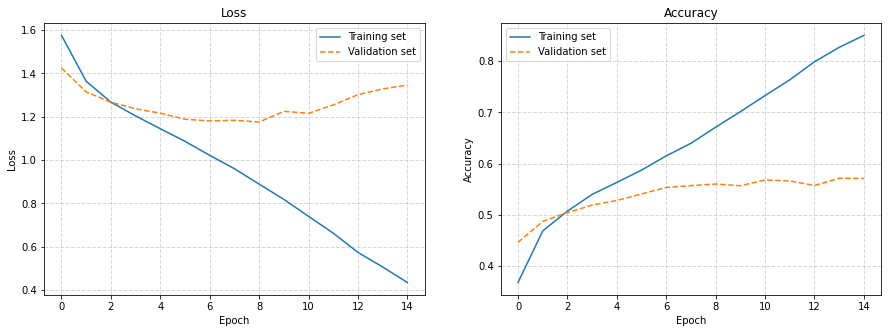

In [197]:
## Plot accuracy dan Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

In [1]:
np.argmax(model.predict(validation_generator), axis=1)

NameError: ignored

In [ ]:
np.argmax(validation_generator.classes, axis=1)

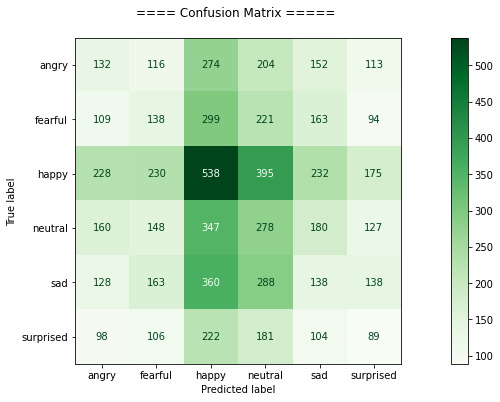

========= Classification Report ==========


AxisError: ignored

In [198]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import numpy as np

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

labels_list = list(train_generator.class_indices.keys())


fig, ax = plt.subplots(figsize=(18, 6))
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title("==== Confusion Matrix ===== \n")
plt.show()


print("=============== Classification Report ================")
labels_test = np.argmax(validation_generator.classes, axis=1)
print(classification_report(labels_test, y_pred, target_names=labels_list))

In [ ]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, classification_report


# predictions = model.predict(X_test)
# prediction_labels = np.argmax(predictions, axis=1)
# labels_test = np.argmax(y_test, axis=1)

# labels_list = list(train_generator.class_indices.keys())


# print("================== Classification Report =====================")
# print(classification_report(labels_test, prediction_labels, target_names=label_list))
# print("===============================================================")
# print("==================== Confusing Matrix ========================")
# pd.DataFrame(confusion_matrix(labels_test, prediction_labels), index=label_list, columns=label_list)

# Deployment

In [ ]:
## save model keras *.h5

if os.path.exists('model')==False:
  os.mkdir('model')

model.save_weights("/content/model/model_weights.h5")
model.save("/content/model/model.h5")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Convert Model keras ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

## save model *.tflite
with open('/content/model/model.tflite', 'wb') as f:
  f.write(tflite_model)